# Joyce Adarkwah<a href="#Joyce-Adarkwah" class="anchor-link">¶</a>

## Project 2 - Cars4U<a href="#Project-2---Cars4U" class="anchor-link">¶</a>

### Objective<a href="#Objective" class="anchor-link">¶</a>

To explore and visualize the dataset, build a linear regression model to
predict the prices of used cars, and generate a set of insights and
recommendations that will help the business.

### Data Description<a href="#Data-Description" class="anchor-link">¶</a>

The data contains the different attributes of used cars sold in
different locations. The detailed data dictionary is given below.

### Data Dictionary<a href="#Data-Dictionary" class="anchor-link">¶</a>

S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for
purchase (cities)

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers (a unit used to measure length
or distance) driven in the car by the previous owner(s)

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric,
CNG, LPG)

Transmission: The type of transmission used by the car
(Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or
km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh
INR = 100,000 INR)

Price: The price of the used car in INR Lakhs

## Importing essential libraries<a href="#Importing-essential-libraries" class="anchor-link">¶</a>

In \[120\]:

    import pandas as pd
    import numpy as np

    import matplotlib.pyplot as plt
    import seaborn as sns

    # To build linear model for prediction
    from sklearn.linear_model import LinearRegression
    # To check model performance
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Loading and Exploration the data<a href="#Loading-and-Exploration-the-data" class="anchor-link">¶</a>

In \[121\]:

    cars4u_data = pd.read_csv("used_cars_data.csv", index_col=0)

    #understanding the shape of the dataset
    print(f'There are {cars4u_data.shape[0]} rows and {cars4u_data.shape[1]} columns.') 

    There are 7253 rows and 13 columns.

In \[122\]:

    pd.read_csv("used_cars_data.csv")

Out\[122\]:

|      | S.No. | Name                                              | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage    | Engine  | Power     | Seats | New_Price | Price |
|------|-------|---------------------------------------------------|------------|------|-------------------|-----------|--------------|------------|------------|---------|-----------|-------|-----------|-------|
| 0    | 0     | Maruti Wagon R LXI CNG                            | Mumbai     | 2010 | 72000             | CNG       | Manual       | First      | 26.6 km/kg | 998 CC  | 58.16 bhp | 5.0   | 5.51      | 1.75  |
| 1    | 1     | Hyundai Creta 1.6 CRDi SX Option                  | Pune       | 2015 | 41000             | Diesel    | Manual       | First      | 19.67 kmpl | 1582 CC | 126.2 bhp | 5.0   | 16.06     | 12.50 |
| 2    | 2     | Honda Jazz V                                      | Chennai    | 2011 | 46000             | Petrol    | Manual       | First      | 18.2 kmpl  | 1199 CC | 88.7 bhp  | 5.0   | 8.61      | 4.50  |
| 3    | 3     | Maruti Ertiga VDI                                 | Chennai    | 2012 | 87000             | Diesel    | Manual       | First      | 20.77 kmpl | 1248 CC | 88.76 bhp | 7.0   | 11.27     | 6.00  |
| 4    | 4     | Audi A4 New 2.0 TDI Multitronic                   | Coimbatore | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.2 kmpl  | 1968 CC | 140.8 bhp | 5.0   | 53.14     | 17.74 |
| ...  | ...   | ...                                               | ...        | ...  | ...               | ...       | ...          | ...        | ...        | ...     | ...       | ...   | ...       | ...   |
| 7248 | 7248  | Volkswagen Vento Diesel Trendline                 | Hyderabad  | 2011 | 89411             | Diesel    | Manual       | First      | 20.54 kmpl | 1598 CC | 103.6 bhp | 5.0   | 13.23     | NaN   |
| 7249 | 7249  | Volkswagen Polo GT TSI                            | Mumbai     | 2015 | 59000             | Petrol    | Automatic    | First      | 17.21 kmpl | 1197 CC | 103.6 bhp | 5.0   | 10.15     | NaN   |
| 7250 | 7250  | Nissan Micra Diesel XV                            | Kolkata    | 2012 | 28000             | Diesel    | Manual       | First      | 23.08 kmpl | 1461 CC | 63.1 bhp  | 5.0   | 9.47      | NaN   |
| 7251 | 7251  | Volkswagen Polo GT TSI                            | Pune       | 2013 | 52262             | Petrol    | Automatic    | Third      | 17.2 kmpl  | 1197 CC | 103.6 bhp | 5.0   | 10.15     | NaN   |
| 7252 | 7252  | Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan... | Kochi      | 2014 | 72443             | Diesel    | Automatic    | First      | 10.0 kmpl  | 2148 CC | 170 bhp   | 5.0   | 86.97     | NaN   |

7253 rows × 14 columns

In \[123\]:

    np.random.seed(1)
    cars4u_data.sample(n=10)

Out\[123\]:

|       | Name                                      | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage    | Engine  | Power      | Seats | New_Price | Price |
|-------|-------------------------------------------|------------|------|-------------------|-----------|--------------|------------|------------|---------|------------|-------|-----------|-------|
| S.No. |                                           |            |      |                   |           |              |            |            |         |            |       |           |       |
| 2397  | Ford EcoSport 1.5 Petrol Trend            | Kolkata    | 2016 | 21460             | Petrol    | Manual       | First      | 17.0 kmpl  | 1497 CC | 121.36 bhp | 5.0   | 9.47      | 6.00  |
| 3777  | Maruti Wagon R VXI 1.2                    | Kochi      | 2015 | 49818             | Petrol    | Manual       | First      | 21.5 kmpl  | 1197 CC | 81.80 bhp  | 5.0   | 5.44      | 4.11  |
| 4425  | Ford Endeavour 4x2 XLT                    | Hyderabad  | 2007 | 130000            | Diesel    | Manual       | First      | 13.1 kmpl  | 2499 CC | 141 bhp    | 7.0   | 35.29     | 6.00  |
| 3661  | Mercedes-Benz E-Class E250 CDI Avantgrade | Coimbatore | 2016 | 39753             | Diesel    | Automatic    | First      | 13.0 kmpl  | 2143 CC | 201.1 bhp  | 5.0   | 86.97     | 35.28 |
| 4514  | Hyundai Xcent 1.2 Kappa AT SX Option      | Kochi      | 2016 | 45560             | Petrol    | Automatic    | First      | 16.9 kmpl  | 1197 CC | 82 bhp     | 5.0   | 8.23      | 6.34  |
| 599   | Toyota Innova Crysta 2.8 ZX AT            | Coimbatore | 2019 | 40674             | Diesel    | Automatic    | First      | 11.36 kmpl | 2755 CC | 171.5 bhp  | 7.0   | 28.05     | 24.82 |
| 186   | Mercedes-Benz E-Class E250 CDI Avantgrade | Bangalore  | 2014 | 37382             | Diesel    | Automatic    | First      | 13.0 kmpl  | 2143 CC | 201.1 bhp  | 5.0   | 86.97     | 32.00 |
| 305   | Audi A6 2011-2015 2.0 TDI Premium Plus    | Kochi      | 2014 | 61726             | Diesel    | Automatic    | First      | 17.68 kmpl | 1968 CC | 174.33 bhp | 5.0   | 67.10     | 20.77 |
| 4582  | Hyundai i20 1.2 Magna                     | Kolkata    | 2011 | 36000             | Petrol    | Manual       | First      | 18.5 kmpl  | 1197 CC | 80 bhp     | 5.0   | 10.25     | 2.50  |
| 5434  | Honda WR-V Edge Edition i-VTEC S          | Kochi      | 2019 | 13913             | Petrol    | Manual       | First      | 17.5 kmpl  | 1199 CC | 88.7 bhp   | 5.0   | 9.36      | 8.20  |

### Checking the data types of the columns for the dataset<a href="#Checking-the-data-types-of-the-columns-for-the-dataset" class="anchor-link">¶</a>

In \[124\]:

    cars4u_data.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 7253 entries, 0 to 7252
    Data columns (total 13 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Name               7253 non-null   object 
     1   Location           7253 non-null   object 
     2   Year               7253 non-null   int64  
     3   Kilometers_Driven  7253 non-null   int64  
     4   Fuel_Type          7253 non-null   object 
     5   Transmission       7253 non-null   object 
     6   Owner_Type         7253 non-null   object 
     7   Mileage            7251 non-null   object 
     8   Engine             7207 non-null   object 
     9   Power              7078 non-null   object 
     10  Seats              7200 non-null   float64
     11  New_Price          7253 non-null   float64
     12  Price              6019 non-null   float64
    dtypes: float64(3), int64(2), object(8)
    memory usage: 793.3+ KB

-   There are 5 numerical columns and 8 object
-   Mileage, Engine and Power are being read as objects but we have to
    convert them to numerical by droping the units

In \[125\]:

    #Checking the unique values in Mileage to check if the units are all the same. 
    cars4u_data['Mileage'].unique()

Out\[125\]:

    array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
           '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
           '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
           '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
           '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
           '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
           '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
           '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
           '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
           '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
           '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
           '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
           '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
           '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
           '16.5 kmpl', '18.53 kmpl', '17.57 kmpl', '18.0 kmpl', '23.2 kmpl',
           '16.73 kmpl', '17.0 kmpl', '13.0 kmpl', '17.68 kmpl', '22.7 kmpl',
           '16.2 kmpl', '15.26 kmpl', '23.0 kmpl', '19.83 kmpl', '14.94 kmpl',
           '17.71 kmpl', '14.74 kmpl', '16.0 kmpl', '22.32 kmpl',
           '12.99 kmpl', '23.3 kmpl', '19.15 kmpl', '10.8 kmpl', '15.0 kmpl',
           '22.0 kmpl', '21.9 kmpl', '12.05 kmpl', '11.7 kmpl', '21.21 kmpl',
           '20.73 kmpl', '21.1 kmpl', '24.07 kmpl', '19.0 kmpl', '20.58 kmpl',
           '19.27 kmpl', '11.5 kmpl', '18.6 kmpl', '21.14 kmpl', '11.05 kmpl',
           '21.76 kmpl', '7.81 kmpl', '21.66 kmpl', '17.2 kmpl', '20.63 kmpl',
           '19.4 kmpl', '14.8 kmpl', '26.0 kmpl', '20.4 kmpl', '21.5 kmpl',
           '15.3 kmpl', '17.9 kmpl', '16.6 kmpl', '22.54 kmpl', '25.44 kmpl',
           '13.7 kmpl', '22.48 kmpl', '12.9 kmpl', '19.98 kmpl', '21.4 kmpl',
           '19.81 kmpl', '15.4 kmpl', '25.47 kmpl', '19.87 kmpl',
           '17.45 kmpl', '14.7 kmpl', '15.64 kmpl', '15.73 kmpl',
           '23.59 kmpl', '16.1 kmpl', '27.4 kmpl', '20.46 kmpl', '15.29 kmpl',
           '20.51 kmpl', '11.8 kmpl', '14.3 kmpl', '14.67 kmpl', '17.19 kmpl',
           '21.03 kmpl', '22.5 kmpl', '16.82 kmpl', '11.72 kmpl', '17.4 kmpl',
           '17.05 kmpl', '24.0 kmpl', '28.09 kmpl', '20.5 kmpl', '13.1 kmpl',
           '19.91 kmpl', '18.7 kmpl', '16.38 kmpl', '11.57 kmpl', '17.3 kmpl',
           '22.95 kmpl', '18.88 kmpl', '23.4 kmpl', '22.74 kmpl',
           '12.07 kmpl', '17.1 kmpl', '18.48 kmpl', '16.47 kmpl', '23.1 kmpl',
           '14.07 kmpl', '16.02 kmpl', '19.3 kmpl', '17.7 kmpl', '9.52 kmpl',
           '14.75 kmpl', '26.3 km/kg', '11.3 kmpl', '21.12 kmpl',
           '21.02 kmpl', '14.45 kmpl', '19.33 kmpl', '13.8 kmpl', '24.7 kmpl',
           '11.0 kmpl', '11.07 kmpl', '21.43 kmpl', '14.21 kmpl',
           '18.86 kmpl', '16.07 kmpl', '13.49 kmpl', '20.38 kmpl',
           '12.0 kmpl', '17.01 kmpl', '13.2 kmpl', '20.37 kmpl', '15.1 km/kg',
           '15.96 kmpl', '14.16 kmpl', '13.17 kmpl', '27.62 kmpl',
           '25.1 kmpl', '15.17 kmpl', '11.33 kmpl', '17.92 kmpl',
           '12.55 kmpl', '12.6 kmpl', '17.72 kmpl', '18.16 kmpl',
           '15.68 kmpl', '15.5 kmpl', '12.1 kmpl', '14.83 kmpl', '17.6 kmpl',
           '14.6 kmpl', '14.66 kmpl', '10.93 kmpl', '20.68 kmpl', '9.9 kmpl',
           '21.13 kmpl', '20.14 kmpl', '19.2 kmpl', '27.3 kmpl', '16.36 kmpl',
           '26.59 kmpl', '12.5 kmpl', '13.6 kmpl', '15.06 kmpl', '10.13 kmpl',
           '17.21 kmpl', '15.97 kmpl', '10.5 kmpl', '14.69 kmpl', '23.9 kmpl',
           '19.1 kmpl', '21.27 kmpl', '15.9 kmpl', '20.7 kmpl', '14.1 kmpl',
           '20.89 kmpl', '18.12 kmpl', '12.3 kmpl', '19.71 kmpl', '9.43 kmpl',
           '13.4 kmpl', '13.14 kmpl', '18.1 kmpl', '22.77 kmpl', '14.49 kmpl',
           '12.39 kmpl', '10.91 kmpl', '20.85 kmpl', '15.63 kmpl',
           '27.39 kmpl', '18.3 kmpl', '16.78 kmpl', '25.5 kmpl', '10.0 kmpl',
           '13.73 kmpl', '24.2 kmpl', '14.02 kmpl', '26.83 km/kg',
           '16.77 kmpl', '24.5 kmpl', '20.34 kmpl', '21.7 kmpl', '9.7 kmpl',
           '14.33 kmpl', '21.64 kmpl', '13.2 km/kg', '19.16 kmpl',
           '16.93 kmpl', '9.0 kmpl', '26.2 km/kg', '16.3 kmpl', '12.62 kmpl',
           '17.3 km/kg', '20.64 kmpl', '14.24 kmpl', '18.06 kmpl',
           '10.2 kmpl', '10.1 kmpl', '18.25 kmpl', '13.93 kmpl', '25.83 kmpl',
           '8.6 kmpl', '13.24 kmpl', '17.09 kmpl', '23.84 kmpl', '8.45 kmpl',
           '19.6 kmpl', '19.5 kmpl', '20.3 kmpl', '16.05 kmpl', '11.2 kmpl',
           '27.03 kmpl', '18.78 kmpl', '12.35 kmpl', '14.59 kmpl',
           '17.32 kmpl', '14.95 kmpl', '13.22 kmpl', '23.03 kmpl',
           '33.44 km/kg', '15.6 kmpl', '19.12 kmpl', '10.98 kmpl',
           '33.54 km/kg', '16.46 kmpl', '18.4 kmpl', '11.1 kmpl',
           '13.01 kmpl', '18.8 kmpl', '16.52 kmpl', '18.44 kmpl',
           '19.49 kmpl', '23.5 kmpl', '23.8 kmpl', '12.65 kmpl', '20.65 kmpl',
           '21.72 kmpl', '12.19 kmpl', '26.1 kmpl', '18.33 kmpl',
           '12.81 kmpl', '17.5 km/kg', '17.06 kmpl', '17.67 kmpl',
           '19.34 kmpl', '8.3 kmpl', '16.96 kmpl', '11.79 kmpl', '20.86 kmpl',
           '16.98 kmpl', '11.68 kmpl', '15.74 kmpl', '15.7 kmpl',
           '18.49 kmpl', '10.9 kmpl', '19.59 kmpl', '11.4 kmpl', '13.06 kmpl',
           '21.0 kmpl', '15.15 kmpl', '16.9 kmpl', '18.23 kmpl', '25.0 km/kg',
           '17.16 kmpl', '17.43 kmpl', '19.08 kmpl', '18.56 kmpl',
           '11.9 kmpl', '24.6 km/kg', '21.79 kmpl', '12.95 kmpl', '25.6 kmpl',
           '13.45 km/kg', '26.21 kmpl', '13.58 kmpl', '16.25 kmpl',
           '10.4 kmpl', '17.44 kmpl', '19.2 km/kg', '22.71 kmpl',
           '17.54 kmpl', '22.1 km/kg', '17.0 km/kg', '15.87 kmpl', '9.5 kmpl',
           '11.56 kmpl', '14.39 kmpl', '19.09 kmpl', '17.85 kmpl',
           '31.79 km/kg', '18.18 kmpl', '21.19 kmpl', '21.8 kmpl',
           '15.42 kmpl', '14.47 kmpl', '19.69 kmpl', '12.83 kmpl', '8.0 kmpl',
           '22.8 km/kg', '12.63 kmpl', '14.57 kmpl', '27.28 kmpl',
           '15.41 kmpl', '32.26 km/kg', '18.19 kmpl', '13.33 kmpl',
           '16.7 kmpl', '17.84 kmpl', '20.0 km/kg', '23.19 kmpl',
           '11.49 kmpl', '18.51 kmpl', '13.44 kmpl', '8.7 kmpl', '8.77 kmpl',
           '17.97 kmpl', '23.57 kmpl', '12.37 kmpl', '9.1 kmpl', '12.51 kmpl',
           '19.44 kmpl', '21.38 kmpl', '16.51 kmpl', '24.8 kmpl',
           '14.42 kmpl', '14.53 km/kg', '26.8 kmpl', '24.04 kmpl', '9.8 kmpl',
           '19.68 kmpl', '21.4 km/kg', '21.2 kmpl', '19.72 kmpl', '14.2 kmpl',
           '12.98 kmpl', '23.01 kmpl', '16.12 kmpl', '9.3 kmpl', '15.85 kmpl',
           nan, '17.88 kmpl', '10.6 kmpl', '11.78 kmpl', '7.94 kmpl',
           '25.01 kmpl', '8.1 kmpl', '13.9 kmpl', '11.62 kmpl', '20.62 kmpl',
           '15.11 kmpl', '10.37 kmpl', '18.59 kmpl', '9.74 kmpl',
           '14.81 kmpl', '8.2 kmpl', '12.97 kmpl', '7.5 kmpl', '30.46 km/kg',
           '6.4 kmpl', '12.85 kmpl', '18.69 kmpl', '17.24 kmpl', '13.07 kmpl',
           '12.2 kmpl', '20.8 kmpl', '11.88 km/kg', '12.08 kmpl',
           '15.56 kmpl', '14.5 kmpl', '17.15 kmpl'], dtype=object)

The above shows that there are two types of units in the Mileage column.
Since Kpml is associated with a different fuel type, there is no need to
do any conversion between them, therefore I will just drop the units in
the next sheel and continue with analysis.

Also, since Engine and Power contains units that are interfering in
their data types, I will drop their units in the next couple of slides
as well.

## Dropping the units for Mileage, Engine and Power<a href="#Dropping-the-units-for-Mileage,-Engine-and-Power" class="anchor-link">¶</a>

In \[126\]:

    cars4u_data['Mileage'] = cars4u_data['Mileage'].str.split(' ').str[0]
    cars4u_data['Mileage'] = pd.to_numeric(cars4u_data['Mileage'], errors='coerce')

In \[127\]:

    cars4u_data['Engine'] = cars4u_data['Engine'].str.split(' ').str[0]
    cars4u_data['Engine'] = pd.to_numeric(cars4u_data['Engine'], errors='coerce')

In \[128\]:

    cars4u_data['Power'] = cars4u_data['Power'].str.split(' ').str[0]
    cars4u_data['Power'] = pd.to_numeric(cars4u_data['Power'], errors='coerce')

## Checking data ypes after dropping the units<a href="#Checking-data-ypes-after-dropping-the-units" class="anchor-link">¶</a>

In \[129\]:

    cars4u_data.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 7253 entries, 0 to 7252
    Data columns (total 13 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Name               7253 non-null   object 
     1   Location           7253 non-null   object 
     2   Year               7253 non-null   int64  
     3   Kilometers_Driven  7253 non-null   int64  
     4   Fuel_Type          7253 non-null   object 
     5   Transmission       7253 non-null   object 
     6   Owner_Type         7253 non-null   object 
     7   Mileage            7251 non-null   float64
     8   Engine             7207 non-null   float64
     9   Power              7078 non-null   float64
     10  Seats              7200 non-null   float64
     11  New_Price          7253 non-null   float64
     12  Price              6019 non-null   float64
    dtypes: float64(6), int64(2), object(5)
    memory usage: 793.3+ KB

## Checking for Missing Values<a href="#Checking-for-Missing-Values" class="anchor-link">¶</a>

In \[130\]:

    cars4u_data.isnull().sum()

Out\[130\]:

    Name                    0
    Location                0
    Year                    0
    Kilometers_Driven       0
    Fuel_Type               0
    Transmission            0
    Owner_Type              0
    Mileage                 2
    Engine                 46
    Power                 175
    Seats                  53
    New_Price               0
    Price                1234
    dtype: int64

From the above, there are missing values in 5 of the columns in the
dataset. I will treat these missing values later on the analysis.

## Checking for duplicate entries in the Data<a href="#Checking-for-duplicate-entries-in-the-Data" class="anchor-link">¶</a>

In \[131\]:

    cars4u_data.duplicated().sum()

Out\[131\]:

    1

There is one duplicate entru in the dataset, I will revove it.

In \[132\]:

    # dropping duplicate entry from the data
    cars4u_data.drop_duplicates(inplace=True)

    # resetting the index of data frame since some rows will be removed
    cars4u_data.reset_index(drop=True,inplace=True)

## Checking for the Statistical summary of the data<a href="#Checking-for-the-Statistical-summary-of-the-data" class="anchor-link">¶</a>

In \[133\]:

    cars4u_data.describe()

Out\[133\]:

|       | Year        | Kilometers_Driven | Mileage     | Engine      | Power       | Seats       | New_Price   | Price       |
|-------|-------------|-------------------|-------------|-------------|-------------|-------------|-------------|-------------|
| count | 7252.000000 | 7.252000e+03      | 7250.000000 | 7206.000000 | 7077.000000 | 7199.000000 | 7252.000000 | 6019.000000 |
| mean  | 2013.365830 | 5.869999e+04      | 18.141738   | 1616.590064 | 112.764474  | 5.279761    | 21.308387   | 9.479468    |
| std   | 3.254405    | 8.443351e+04      | 4.562492    | 595.324779  | 53.497297   | 0.811709    | 24.257816   | 11.187917   |
| min   | 1996.000000 | 1.710000e+02      | 0.000000    | 72.000000   | 34.200000   | 0.000000    | 3.910000    | 0.440000    |
| 25%   | 2011.000000 | 3.400000e+04      | 15.170000   | 1198.000000 | 75.000000   | 5.000000    | 7.880000    | 3.500000    |
| 50%   | 2014.000000 | 5.342900e+04      | 18.160000   | 1493.000000 | 94.000000   | 5.000000    | 11.300000   | 5.640000    |
| 75%   | 2016.000000 | 7.300000e+04      | 21.100000   | 1968.000000 | 138.100000  | 5.000000    | 21.697500   | 9.950000    |
| max   | 2019.000000 | 6.500000e+06      | 33.540000   | 5998.000000 | 616.000000  | 10.000000   | 375.000000  | 160.000000  |

In \[134\]:

    cars4u_data.describe(include='all').T

Out\[134\]:

|                   | count  | unique | top                    | freq | mean        | std          | min    | 25%     | 50%     | 75%     | max       |
|-------------------|--------|--------|------------------------|------|-------------|--------------|--------|---------|---------|---------|-----------|
| Name              | 7252   | 2041   | Mahindra XUV500 W8 2WD | 55   | NaN         | NaN          | NaN    | NaN     | NaN     | NaN     | NaN       |
| Location          | 7252   | 11     | Mumbai                 | 948  | NaN         | NaN          | NaN    | NaN     | NaN     | NaN     | NaN       |
| Year              | 7252.0 | NaN    | NaN                    | NaN  | 2013.36583  | 3.254405     | 1996.0 | 2011.0  | 2014.0  | 2016.0  | 2019.0    |
| Kilometers_Driven | 7252.0 | NaN    | NaN                    | NaN  | 58699.9869  | 84433.505524 | 171.0  | 34000.0 | 53429.0 | 73000.0 | 6500000.0 |
| Fuel_Type         | 7252   | 5      | Diesel                 | 3852 | NaN         | NaN          | NaN    | NaN     | NaN     | NaN     | NaN       |
| Transmission      | 7252   | 2      | Manual                 | 5203 | NaN         | NaN          | NaN    | NaN     | NaN     | NaN     | NaN       |
| Owner_Type        | 7252   | 4      | First                  | 5951 | NaN         | NaN          | NaN    | NaN     | NaN     | NaN     | NaN       |
| Mileage           | 7250.0 | NaN    | NaN                    | NaN  | 18.141738   | 4.562492     | 0.0    | 15.17   | 18.16   | 21.1    | 33.54     |
| Engine            | 7206.0 | NaN    | NaN                    | NaN  | 1616.590064 | 595.324779   | 72.0   | 1198.0  | 1493.0  | 1968.0  | 5998.0    |
| Power             | 7077.0 | NaN    | NaN                    | NaN  | 112.764474  | 53.497297    | 34.2   | 75.0    | 94.0    | 138.1   | 616.0     |
| Seats             | 7199.0 | NaN    | NaN                    | NaN  | 5.279761    | 0.811709     | 0.0    | 5.0     | 5.0     | 5.0     | 10.0      |
| New_Price         | 7252.0 | NaN    | NaN                    | NaN  | 21.308387   | 24.257816    | 3.91   | 7.88    | 11.3    | 21.6975 | 375.0     |
| Price             | 6019.0 | NaN    | NaN                    | NaN  | 9.479468    | 11.187917    | 0.44   | 3.5     | 5.64    | 9.95    | 160.0     |

I checked the statiscal summaries from two angles; first to assess the
numerical columns and second, to include all for a broader picture.

-   It can be noted that there are unique values in the name column,
    which I presume represents the names of the different types of cars
    we have in the dataset. It seems the most common car in the data is
    Mahindra XUV500 W8 2WD with a frequency of 55.
-   The cars are available in 11 different locations and Mumbai has the
    most cars with a value of 948
-   The average car has driven 58699.9869km with the minimum being 171km
    and 6500000 km maximum. This shows that the maximum km driven is
    very close to the average km driven.
-   Average Mileage 18.141738 with minimum Mileage being 0.0 and maximum
    being 33.54.
-   Price ranges from 0.44 minimum to 160 maximum with the average being
    9.479468. On average, new cars of the same brand cost about 60
    percent more than its used car counterparts. Also, it seems that The
    more power a car has the more it costs, which is particularly true
    for prices of new cars.
-   Manufactoring Year of the cars ranges from 1996 to 2019
-   The average car has 5 seats which is also the minimum and the
    maximum number of seats is 10
-   Price is the dependent Variable

## Univariate Analysis<a href="#Univariate-Analysis" class="anchor-link">¶</a>

In the statistical analysis above, I learnt a great deal about the
ranges within the numerical columns as well as the different types of
catergories of the cars in term of names, location, seats and etc.

Below, I will be applying some visualization techniques in my univariate
analysis to clarify the distribution of the same numerical columns.

#### Observations on Price<a href="#Observations-on-Price" class="anchor-link">¶</a>

In \[135\]:

    sns.histplot(data=cars4u_data,x='Price')
    plt.show()
    sns.boxplot(data=cars4u_data,x='Price')
    plt.show()

![](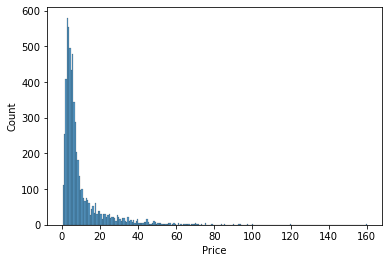%0A)

![](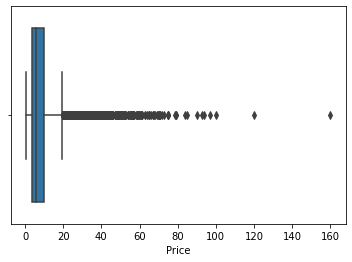%0A)

In \[136\]:

    sns.histplot(data=cars4u_data,x='Power')
    plt.show()
    sns.boxplot(data=cars4u_data,x='Power')
    plt.show()

![](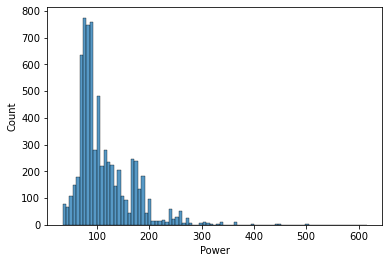%0A)

![](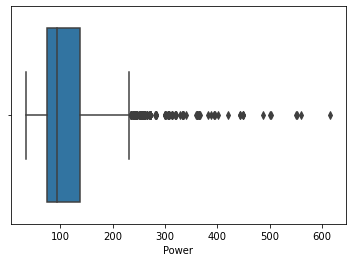%0A)

In \[137\]:

    sns.countplot(data=cars4u_data,x='Location')
    plt.xticks(rotation=90)
    plt.show()

![](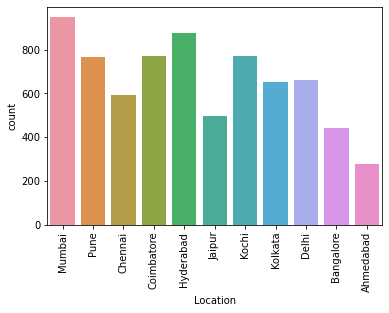%0A)

In \[138\]:

    sns.countplot(data=cars4u_data,x='Year')
    plt.xticks(rotation=90)
    plt.show()

![](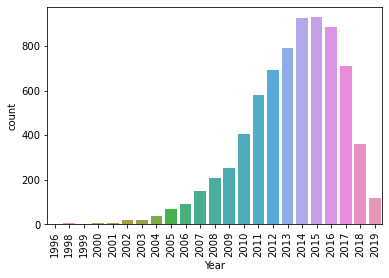%0A)

In \[139\]:

    sns.countplot(data=cars4u_data,x='Owner_Type')
    plt.xticks(rotation=90)
    plt.show()

![](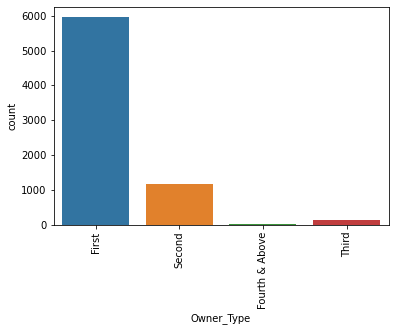%0A)

## Bivariate Analysis<a href="#Bivariate-Analysis" class="anchor-link">¶</a>

In \[140\]:

    plt.figure(figsize=(10,5))
    sns.heatmap(cars4u_data.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
    plt.show()

![](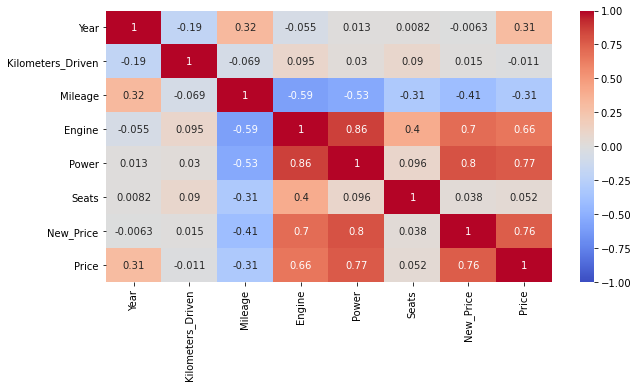%0A)

Looking at the heatmap and correlation above, above, we can deduce that
there are high possitive correlations between the following:

Power - Engine Power - New Price Power - Price Price - New Price

and negative Correlation between

Engine - Mileage Power - Mileage

In \[141\]:

    plt.figure(figsize=(10,5))
    sns.scatterplot(data=cars4u_data,x='Mileage',y='Price')
    plt.show()

![](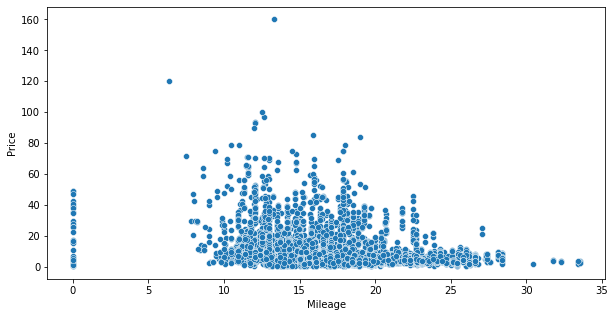%0A)

In \[142\]:

    plt.figure(figsize=(10,5))
    sns.scatterplot(data=cars4u_data,x='Location',y='Price')
    plt.show()

![](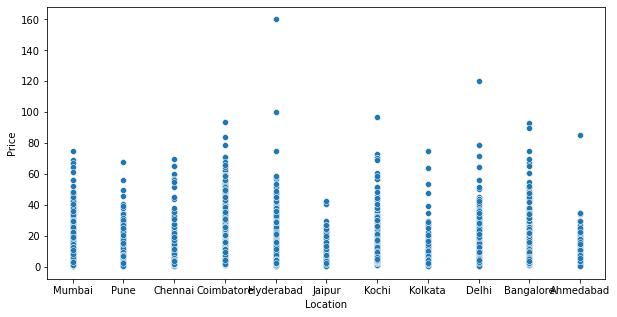%0A)

In \[143\]:

    plt.figure(figsize=(10,5))
    sns.scatterplot(data=cars4u_data,x='Year',y='Price')
    plt.show()

![](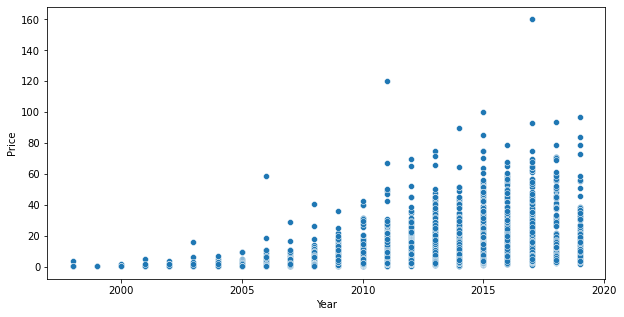%0A)

## Data Pre-Processing<a href="#Data-Pre-Processing" class="anchor-link">¶</a>

In the above distribution and analysis, I realized that there are a
great deal of outlier and missing values were noted in 5 columns so I
will be working on treaating the outliers and work on the missing values
as well.

## Missing value treatment<a href="#Missing-value-treatment" class="anchor-link">¶</a>

In \[144\]:

    # Checking the missing values again
    cars4u_data.isnull().sum()

Out\[144\]:

    Name                    0
    Location                0
    Year                    0
    Kilometers_Driven       0
    Fuel_Type               0
    Transmission            0
    Owner_Type              0
    Mileage                 2
    Engine                 46
    Power                 175
    Seats                  53
    New_Price               0
    Price                1233
    dtype: int64

It seems manay of the significant independent variables have missing
values. Power, Mileage, Engine and Seats are all significant factors
that affect the price of a car so it's important to treat these missing
values.

For this analysis, I will like to use the average values for those
columns

I will be using the python method "fillna" from the pandas library,
which will replace missing values with the mean as I instruct it to do.
Please see below.

In \[145\]:

    cars4u_data['Mileage'].fillna(cars4u_data['Mileage'].mean(), inplace=True) 

In \[146\]:

    cars4u_data['Engine'].fillna(cars4u_data['Engine'].mean(), inplace=True)

In \[147\]:

    cars4u_data['Seats'].fillna(cars4u_data['Seats'].mean(), inplace=True)

In \[148\]:

    cars4u_data['Power'].fillna(cars4u_data['Power'].mean(), inplace=True)

In \[149\]:

    cars4u_data['Price'].fillna(cars4u_data['Price'].mean(), inplace=True)

### Checking to see if missing values have been removed.<a href="#Checking-to-see-if-missing-values-have-been-removed." class="anchor-link">¶</a>

In \[150\]:

    cars4u_data.isnull().sum()

Out\[150\]:

    Name                 0
    Location             0
    Year                 0
    Kilometers_Driven    0
    Fuel_Type            0
    Transmission         0
    Owner_Type           0
    Mileage              0
    Engine               0
    Power                0
    Seats                0
    New_Price            0
    Price                0
    dtype: int64

## Outlier Treatment<a href="#Outlier-Treatment" class="anchor-link">¶</a>

It is important to treat outliers in the dataset to improve accuracies
in the regression model. The presence of outliers or extreme values will
impact scewnes which will cause the model to be an inaccurate
representation of the data.

In \[151\]:

    def z_transform(x):
        return (x - np.mean(x)) / np.std(x)

    np.random.seed(1)
    x1 = np.random.normal(size=1000)
    x2 = np.random.lognormal(size=1000)


    plt.hist(z_transform(x1))
    plt.title('z-transformed normal data')
    plt.show()


    plt.hist(z_transform(x2))
    plt.title('z-transformed lognormal data')
    plt.show()

![](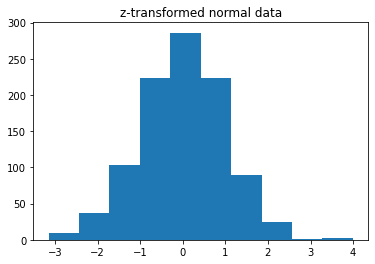%0A)

![](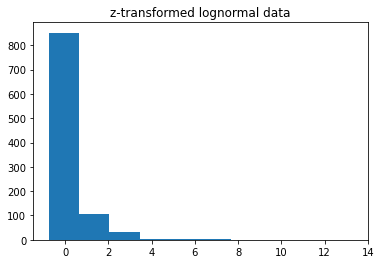%0A)

### Applying the above outlier dectection on Cars4u Dataset<a href="#Applying-the-above-outlier-dectection-on-Cars4u-Dataset" class="anchor-link">¶</a>

In \[152\]:

    # Price
    plt.hist(cars4u_data['Power'], 20)
    plt.title('Histogram of Power')
    plt.show()

    sns.boxplot(cars4u_data['Power'])
    plt.title('Boxplot of Power')
    plt.show()

![](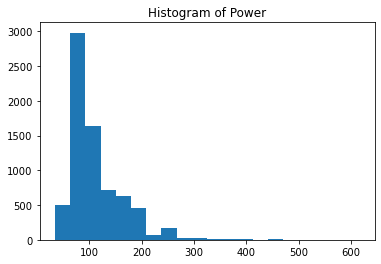%0A)

    C:\Users\rach_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](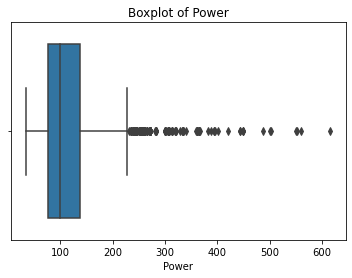%0A)

In \[153\]:

    plt.hist(cars4u_data['Seats'], 20)
    plt.title('Histogram of Seats')
    plt.show()

    sns.boxplot(cars4u_data['Seats'])
    plt.title('Boxplot of Seats')
    plt.show()

![](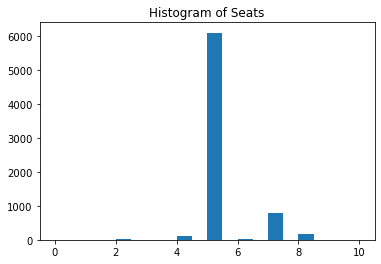%0A)

    C:\Users\rach_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](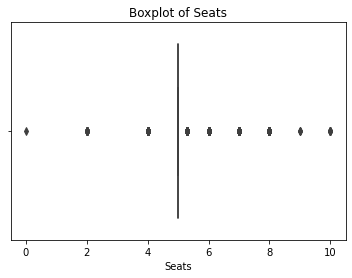%0A)

In \[154\]:

    plt.hist(cars4u_data['Engine'], 20)
    plt.title('Histogram of PEngine')
    plt.show()

    sns.boxplot(cars4u_data['Engine'])
    plt.title('Boxplot of Engine')
    plt.show()

![](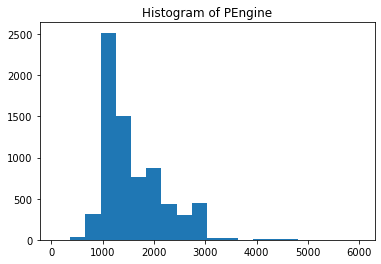%0A)

    C:\Users\rach_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](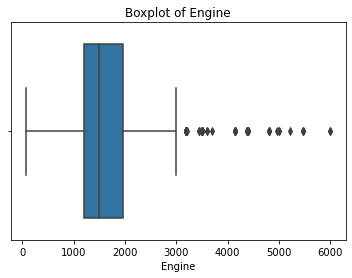%0A)

In \[155\]:

    plt.hist(cars4u_data['Price'], 20)
    plt.title('Histogram of Price')
    plt.show()

    sns.boxplot(cars4u_data['Price'])
    plt.title('Boxplot of Price')
    plt.show()

![](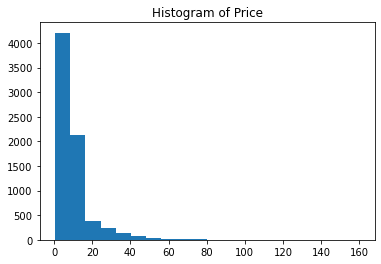%0A)

    C:\Users\rach_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](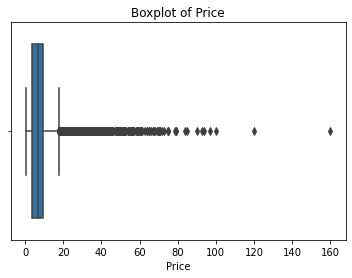%0A)

## Outlier Treatment<a href="#Outlier-Treatment" class="anchor-link">¶</a>

I still dont understand this part and the concept of feature ENginering,
so I will skip and move to use the regression modl but i will my best to
read through again.

# Model Building<a href="#Model-Building" class="anchor-link">¶</a>

### Independent and dependent Variables<a href="#Independent-and-dependent-Variables" class="anchor-link">¶</a>

Note that the Dependent variable in this dataset is "Price"

independent_variabless = df.iloc\[:,:-1\]

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]: